# Crescendo Python Task

## Introduction

Thank you for your interest in Crescendo Technologoies. With this task we wish to assess your ability to work with R for normal data processing/munging tasks that we encounter daily. If you are more familiar/comfortable with Python, we can provide this data in “feather” format.

If you have any questions during this process, please email Michael Yan Michael.Yan@crescendotechnology.com.

For this task we will use the pinnacle.data package from CRAN. For a description of each field, type ?MLB2016. We will also use odds.converter, another Pinnacle package, which allows us to easily convert between different odds types and probabilities.

Pinnacle.data makes public some Pinnacle market data, which is a snapshot of odds changes in betting markets. We will be using the MLB2016 data which is part of this package.

For install the latest pinnacle.data from CRAN, load the library and data

## Load MLB2016 Data and Clean

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('MLB2016.json')
# list first few rows (datapoints)
df.head()

,AwayStartingPitcher,AwayTeam,DoubleHeaderGame,EventDateTimeET,EventDateTimeUTC,FinalScoreAway,FinalScoreHome,GameID,HomeStartingPicher,HomeTeam,Lines
0,A WAINWRIGHT,St. Louis Cardinals,0,2016-04-03 13:05:00,2016-04-03 17:05:00,1,4,PIT201604030,F LIRIANO,Pittsburgh Pirates,"[{'EnteredDateTimeUTC': '2016-03-31 14:16:48',..."
1,M STROMAN,Toronto Blue Jays,0,2016-04-03 16:05:00,2016-04-03 20:05:00,5,3,TBA201604030,C ARCHER,Tampa Bay Rays,"[{'EnteredDateTimeUTC': '2016-03-31 14:17:01',..."
2,M HARVEY,New York Mets,0,2016-04-03 20:35:00,2016-04-04 00:35:00,3,4,KCA201604030,E VOLQUEZ,Kansas City Royals,"[{'EnteredDateTimeUTC': '2016-03-31 14:17:18',..."
3,MBUMGARNER,San Francisco Giants,0,2016-04-04 14:10:00,2016-04-04 18:10:00,12,3,MIL201604040,W PERALTA,Milwaukee Brewers,"[{'EnteredDateTimeUTC': '2016-04-02 17:32:34',..."
4,E SANTANA,Minnesota Twins,0,2016-04-04 15:05:00,2016-04-04 19:05:00,2,3,BAL201604040,C TILLMAN,Baltimore Orioles,"[{'EnteredDateTimeUTC': '2016-04-02 19:44:48',..."


In [3]:
# check datatypes
df.dtypes

AwayStartingPitcher    object
AwayTeam               object
DoubleHeaderGame        int64
EventDateTimeET        object
EventDateTimeUTC       object
FinalScoreAway          int64
FinalScoreHome          int64
GameID                 object
HomeStartingPicher     object
HomeTeam               object
Lines                  object
dtype: object

In [4]:
print('Data size: %d' % len(df))

Data size: 2462


In [5]:
# Check missing data
print(df.isnull().sum())

AwayStartingPitcher    0
AwayTeam               0
DoubleHeaderGame       0
EventDateTimeET        0
EventDateTimeUTC       0
FinalScoreAway         0
FinalScoreHome         0
GameID                 0
HomeStartingPicher     0
HomeTeam               0
Lines                  0
dtype: int64


## Questions

### Q1
**Which team(s) had the most double headers in 2016?**

Hint: The DoubleHeaderGame field can be used to determine which game of the double header this is. 0 means a normal game (no double header that day), 1 means first game of double header, 2 means second game of double header.


### Solution:

In [6]:
# Pre-check if all double header games are recorded pairly
print('Record of 1s: %d' % df.DoubleHeaderGame[df.DoubleHeaderGame == 1].count())

Record of 1s: 14


In [7]:
print('Record of 2s: %d' %df.DoubleHeaderGame[df.DoubleHeaderGame == 2].count())

Record of 2s: 14


In [8]:
selectedcolumn = ['AwayTeam', 'HomeTeam', 'DoubleHeaderGame']

In [9]:
df_double_1 = df[selectedcolumn][df.DoubleHeaderGame == 1]

In [10]:
df_double_2 = df[selectedcolumn][df.DoubleHeaderGame == 2]

In [11]:
df_double_1

,AwayTeam,HomeTeam,DoubleHeaderGame
436,Oakland Athletics,Baltimore Orioles,1
490,San Diego Padres,Chicago Cubs,1
531,Miami Marlins,Washington Nationals,1
585,Boston Red Sox,Kansas City Royals,1
655,Cleveland Indians,Chicago White Sox,1
858,New York Mets,Pittsburgh Pirates,1
1103,Tampa Bay Rays,Baltimore Orioles,1
1405,San Diego Padres,St. Louis Cardinals,1
1482,St. Louis Cardinals,New York Mets,1
1702,Houston Astros,Minnesota Twins,1


In [12]:
df_double_2

,AwayTeam,HomeTeam,DoubleHeaderGame
442,Oakland Athletics,Baltimore Orioles,2
503,San Diego Padres,Chicago Cubs,2
537,Miami Marlins,Washington Nationals,2
594,Boston Red Sox,Kansas City Royals,2
662,Cleveland Indians,Chicago White Sox,2
864,New York Mets,Pittsburgh Pirates,2
1110,Tampa Bay Rays,Baltimore Orioles,2
1416,San Diego Padres,St. Louis Cardinals,2
1490,St. Louis Cardinals,New York Mets,2
1706,Houston Astros,Minnesota Twins,2


In [22]:
# find the team which has the most double headers in 2016
df_frequency = df_double_1.AwayTeam.append(df_double_1.HomeTeam)
df_frequency.to_frame(name='Team').groupby('Team').size().sort_values(ascending=False)

Team
Baltimore Orioles       2
St. Louis Cardinals     2
San Diego Padres        2
Pittsburgh Pirates      2
New York Mets           2
Minnesota Twins         2
Chicago Cubs            2
Detroit Tigers          1
Boston Red Sox          1
Chicago White Sox       1
Cincinnati Reds         1
Cleveland Indians       1
Colorado Rockies        1
Washington Nationals    1
Houston Astros          1
Kansas City Royals      1
Tampa Bay Rays          1
Miami Marlins           1
Milwaukee Brewers       1
Oakland Athletics       1
Los Angeles Dodgers     1
dtype: int64

### Q2

** Create a data frame with the Wins and Losses for each team.**

In [23]:
selectedcolumn = ['AwayTeam', 'HomeTeam', 'FinalScoreAway', 'FinalScoreHome']
df_win_loss = df[selectedcolumn]

In [31]:
df_win_loss['WinAway'] = df_win_loss['FinalScoreAway'] > df_win_loss['FinalScoreHome']
df_win_loss['LoseAway'] = df_win_loss['FinalScoreAway'] < df_win_loss['FinalScoreHome']
df_win_loss['WinHome'] = df_win_loss['LoseAway']
df_win_loss['LoseHome'] = df_win_loss['WinAway']

/Users/liuxy94/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/liuxy94/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/liuxy94/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [32]:
df_win_loss

,AwayTeam,HomeTeam,FinalScoreAway,FinalScoreHome,WinAway,LoseAway,WinHome,LoseHome
0,St. Louis Cardinals,Pittsburgh Pirates,1,4,False,True,True,False
1,Toronto Blue Jays,Tampa Bay Rays,5,3,True,False,False,True
2,New York Mets,Kansas City Royals,3,4,False,True,True,False
3,San Francisco Giants,Milwaukee Brewers,12,3,True,False,False,True
4,Minnesota Twins,Baltimore Orioles,2,3,False,True,True,False
5,Seattle Mariners,Texas Rangers,2,3,False,True,True,False
6,Philadelphia Phillies,Cincinnati Reds,2,6,False,True,True,False
7,Washington Nationals,Atlanta Braves,4,3,True,False,False,True
8,Los Angeles Dodgers,San Diego Padres,15,0,True,False,False,True
9,Toronto Blue Jays,Tampa Bay Rays,5,3,True,False,False,True


### Q3

** Which game had the most odds changes (Lines field) in 2016? (Use Line field)**

Hint: The length of Lines field tells us how many odds changes there were.

In [74]:
for games in df.Lines: # list of dict
#     print(len(games)) 
    for records in games: # dict
#         print(type(records), len(records))
        print(records)
    break
#             Money.append(timestamp.get('SpeadUS1'))
#             print(type(timestamp), len(timestamp))
    

{'EnteredDateTimeUTC': '2016-03-31 14:16:48', 'EnteredDateTimeET': '2016-03-31 10:16:48', 'MoneyUS1': -110, 'MoneyUS2': 102}
{'EnteredDateTimeUTC': '2016-03-31 14:17:36', 'EnteredDateTimeET': '2016-03-31 10:17:36', 'MoneyUS1': -110, 'MoneyUS2': 102, 'TotalPoints': 6.5, 'TotalUSOver': 100, 'TotalUSUnder': -110}
{'EnteredDateTimeUTC': '2016-03-31 15:56:01', 'EnteredDateTimeET': '2016-03-31 11:56:01', 'MoneyUS1': -110, 'MoneyUS2': 102, 'TotalPoints': 6.5, 'TotalUSOver': 106, 'TotalUSUnder': -117}
{'EnteredDateTimeUTC': '2016-03-31 15:56:24', 'EnteredDateTimeET': '2016-03-31 11:56:24', 'MoneyUS1': -110, 'MoneyUS2': 102, 'TotalPoints': 6.5, 'TotalUSOver': 107, 'TotalUSUnder': -118}
{'EnteredDateTimeUTC': '2016-03-31 16:39:11', 'EnteredDateTimeET': '2016-03-31 12:39:11', 'MoneyUS1': -110, 'MoneyUS2': 102, 'TotalPoints': 6.5, 'TotalUSOver': 109, 'TotalUSUnder': -120}
{'EnteredDateTimeUTC': '2016-04-01 04:58:46', 'EnteredDateTimeET': '2016-04-01 00:58:46', 'MoneyUS1': -110, 'MoneyUS2': 102, 'T

In [75]:
df["MoneyUS1"] = ""
df["MoneyUS2"] = ""
df["TotalPoints"] = ""
df["TotalUSOver"] = ""
df["TotalUSUnder"] = ""
df["SpreadTeam1"] = ""
df["SpreadUS1"] = ""
df["SpreadUS2"] = ""
for i in range(len(df)):
    MoneyUS1 = []
    MoneyUS2 = []
    TotalPoints = []
    TotalUSOver = []
    TotalUSUnder = []
    SpreadTeam1 = []
    SpreadUS1 = []
    SpreadUS2 = []
    for j in range(len(df.Lines[i])):
        MoneyUS1.append(df.Lines[i][j].get('MoneyUS1'))
        MoneyUS2.append(df.Lines[i][j].get('MoneyUS2'))
        TotalPoints.append(df.Lines[i][j].get('TotalPoints'))
        TotalUSOver.append(df.Lines[i][j].get('TotalUSOver'))
        TotalUSUnder.append(df.Lines[i][j].get('TotalUSUnder'))
        SpreadTeam1.append(df.Lines[i][j].get('SpreadTeam1'))
        SpreadUS1.append(df.Lines[i][j].get('SpreadUS1'))
        SpreadUS2.append(df.Lines[i][j].get('SpreadUS2'))
    df.at[i,'MoneyUS1'] = MoneyUS1       
    df.at[i,'MoneyUS2'] = MoneyUS2
    df.at[i,'TotalPoints'] = TotalPoints
    df.at[i,'TotalUSOver'] = TotalUSOver        
    df.at[i,'TotalUSUnder'] = TotalUSUnder
    df.at[i,'SpreadTeam1'] = SpreadTeam1
    df.at[i,'SpreadUS1'] = SpreadUS1      
    df.at[i,'SpreadUS2'] = SpreadUS2    

,AwayStartingPitcher,AwayTeam,DoubleHeaderGame,EventDateTimeET,EventDateTimeUTC,FinalScoreAway,FinalScoreHome,GameID,HomeStartingPicher,HomeTeam,Lines,MoneyUS2,MoneyUS1,TotalPoints,TotalUSOver,TotalUSUnder,SpreadTeam1,SpreadUS1,SpreadUS2
0,A WAINWRIGHT,St. Louis Cardinals,0,2016-04-03 13:05:00,2016-04-03 17:05:00,1,4,PIT201604030,F LIRIANO,Pittsburgh Pirates,"[{'EnteredDateTimeUTC': '2016-03-31 14:16:48',...","[102, 102, 102, 102, 102, 102, -101, -101, -10...","[-110, -110, -110, -110, -110, -110, -107, -10...","[None, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5,...","[None, 100, 106, 107, 109, 102, 102, 109, 109,...","[None, -110, -117, -118, -120, -113, -113, -12...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
1,M STROMAN,Toronto Blue Jays,0,2016-04-03 16:05:00,2016-04-03 20:05:00,5,3,TBA201604030,C ARCHER,Tampa Bay Rays,"[{'EnteredDateTimeUTC': '2016-03-31 14:17:01',...","[104, 104, 104, 104, 104, 104, 102, 103, 103, ...","[-113, -113, -113, -113, -113, -113, -110, -11...","[None, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[None, -110, -110, -104, -102, 100, 100, 100, ...","[None, 100, 100, -106, -108, -110, -110, -110,...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
2,M HARVEY,New York Mets,0,2016-04-03 20:35:00,2016-04-04 00:35:00,3,4,KCA201604030,E VOLQUEZ,Kansas City Royals,"[{'EnteredDateTimeUTC': '2016-03-31 14:17:18',...","[106, 106, 106, 106, 104, 104, 104, 107, 107, ...","[-115, -115, -115, -115, -113, -113, -113, -11...","[None, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ...","[None, -115, -122, -119, -119, -120, -128, -12...","[None, 104, 111, 108, 108, 109, 116, 116, 118,...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
3,MBUMGARNER,San Francisco Giants,0,2016-04-04 14:10:00,2016-04-04 18:10:00,12,3,MIL201604040,W PERALTA,Milwaukee Brewers,"[{'EnteredDateTimeUTC': '2016-04-02 17:32:34',...","[165, None, 161, 161, 161, 161, 161, 156, 156,...","[-180, None, -175, -175, -175, -175, -175, -17...","[None, None, None, 7, 7, 7, 7, 7, 7, 7.5, 7.5,...","[None, None, None, -123, -129, -131, -133, -13...","[None, None, None, 111, 117, 119, 120, 120, 12...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non...","[None, None, None, None, None, None, None, Non..."
4,E SANTANA,Minnesota Twins,0,2016-04-04 15:05:00,2016-04-04 19:05:00,2,3,BAL201604040,C TILLMAN,Baltimore Orioles,"[{'EnteredDateTimeUTC': '2016-04-02 19:44:48',...","[-119, -119, -119, -119, -119, -119, -119, -11...","[110, 110, 110, 110, 110, 110, 110, 110, 110, ...","[None, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5,...","[None, -105, -110, -114, -114, -114, -114, -11...","[None, -105, 100, 103, 103, 103, 103, 103, 103...","[None, None, None, None, 1.5, 1.5, 1.5, 1.5, 1...","[None, None, None, None, -180, -180, -188, -18...","[None, None, None, None, 165, 165, 173, 173, 1..."


### Q3.a
** Visualize the ML market (MoneyUs2) for this match after using odds.converter to convert MoneyUs2 to probability.**

In [76]:
game_most_change = df.iloc[1363]['Lines']

In [93]:
from datetime import datetime
times = []
MoneyUS2 = []
for record in game_most_change:
    times.append(datetime.strptime(record.get('EnteredDateTimeUTC'),'%Y-%m-%d %H:%M:%S'))
    MoneyUS2.append(record.get('MoneyUS2'))
ts = pd.Series(MoneyUS2, index = times)

In [95]:
print(times)

[datetime.datetime(2016, 7, 16, 11, 24, 34), datetime.datetime(2016, 7, 16, 11, 24, 39), datetime.datetime(2016, 7, 16, 16, 21, 10), datetime.datetime(2016, 7, 16, 16, 21, 10), datetime.datetime(2016, 7, 16, 16, 26, 16), datetime.datetime(2016, 7, 16, 17, 1, 25), datetime.datetime(2016, 7, 16, 19, 25, 25), datetime.datetime(2016, 7, 16, 19, 37, 6), datetime.datetime(2016, 7, 16, 19, 37, 7), datetime.datetime(2016, 7, 16, 19, 39, 16), datetime.datetime(2016, 7, 16, 19, 39, 18), datetime.datetime(2016, 7, 16, 19, 39, 49), datetime.datetime(2016, 7, 16, 19, 39, 51), datetime.datetime(2016, 7, 16, 19, 41, 27), datetime.datetime(2016, 7, 16, 19, 41, 39), datetime.datetime(2016, 7, 16, 19, 41, 46), datetime.datetime(2016, 7, 16, 19, 41, 53), datetime.datetime(2016, 7, 16, 19, 42, 25), datetime.datetime(2016, 7, 16, 19, 42, 25), datetime.datetime(2016, 7, 16, 19, 42, 31), datetime.datetime(2016, 7, 16, 19, 49, 55), datetime.datetime(2016, 7, 16, 22, 11, 50), datetime.datetime(2016, 7, 16, 23,

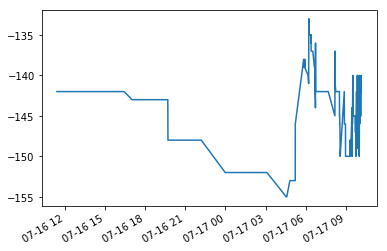

In [94]:
ts.plot()
plt.show()